In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, expon, uniform

## Logic for Graphing

In [100]:
def simulate_and_graph_median_ranges(get_samples_fn, num_simulations, estimated_sample_sizes, rand_seed, dist_name):
    np.random.seed(rand_seed)
    gbl_sample_size_arr = np.array([])
    gbl_sample_maxes = np.array([])
    gbl_sample_mins = np.array([])
    gbl_sample_range_contains_median = np.array([])
    
    for sample_size in estimated_sample_sizes:
        sample_size_arr = np.ones(num_simulations) * sample_size
        sample_maxes = np.empty(num_simulations)
        sample_mins = np.empty(num_simulations)
        sample_range_contains_median = np.empty(num_simulations)
        for i in range(num_simulations):
            curr_samples = get_samples_fn(sample_size)
            curr_max = max(curr_samples)
            curr_min = min(curr_samples)
            curr_contains = curr_max >= median and curr_min <= median
        
            sample_maxes[i] = curr_max
            sample_mins[i] = curr_min
            sample_range_contains_median[i] = curr_contains
        gbl_sample_size_arr = np.append(gbl_sample_size_arr, sample_size_arr)
        gbl_sample_maxes = np.append(gbl_sample_maxes, sample_maxes)
        gbl_sample_mins = np.append(gbl_sample_mins, sample_mins)
        gbl_sample_range_contains_median = np.append(gbl_sample_range_contains_median, sample_range_contains_median)
    
    results_df = pd.DataFrame({
        "sample_size" : gbl_sample_size_arr,
        "sample_max" : gbl_sample_maxes,
        "sample_min" : gbl_sample_mins,
        "sample_range" : gbl_sample_maxes - gbl_sample_mins,
        "median_in_sample_range" : gbl_sample_range_contains_median
    })
    display(results_df)
    
    num_fig_cols = 2
    fig, axs = plt.subplots(len(estimated_sample_sizes) // num_fig_cols, num_fig_cols, figsize=(40, 40))  # width x height in inches
    
    for index, sample_size in enumerate(estimated_sample_sizes):
        successful_ranges = results_df[(results_df["sample_size"] == sample_size) & (results_df["median_in_sample_range"] == True)]["sample_range"]
        false_ranges = results_df[(results_df["sample_size"] == sample_size) & (results_df["median_in_sample_range"] == False)]["sample_range"]
        
        axs[index // num_fig_cols, index % num_fig_cols].hist([successful_ranges, false_ranges], stacked=True, density=True, bins=num_simulations // 50, label=['Range Contains Median', 'Range Does Not Contain Median'], color=['green', 'red'])
        empirical_prob_contains = np.count_nonzero(results_df[results_df["sample_size"] == sample_size]["median_in_sample_range"]) / num_simulations
        axs[index // num_fig_cols, index % num_fig_cols].tick_params(axis='both', which='major', labelsize=24)
        axs[index // num_fig_cols, index % num_fig_cols].set_title(f"{dist_name}, Sample Size: {str(int(sample_size))}, Prob Contains: {empirical_prob_contains} ({1 - 2/(2**sample_size)})", fontsize=26)
        axs[index // num_fig_cols, index % num_fig_cols].set_xlabel("Width of the Max-Min Range (Standard Deviations)", fontsize=26)
        axs[index // num_fig_cols, index % num_fig_cols].set_ylabel("Density", fontsize=26)
    plt.savefig(dist_name.replace(".", "").replace(" ", "_").lower() + "_median_finding.png", transparent=True)
    plt.show()

## Normal Distribution

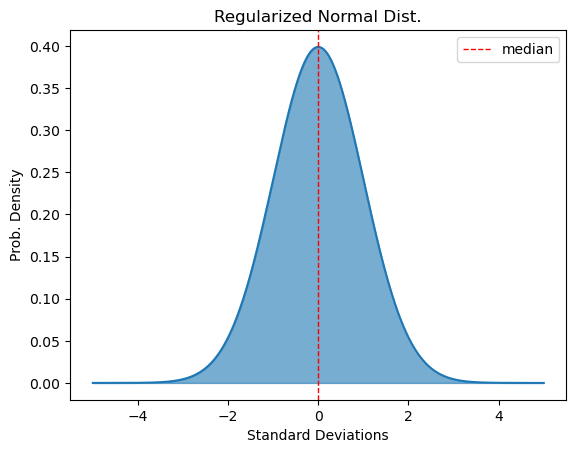

,sample_size,sample_max,sample_min,sample_range,median_in_sample_range
0,2.0,0.781964,0.166085,0.615879,0.0
1,2.0,0.852285,-0.707071,1.559356,1.0
2,2.0,0.886661,-0.931657,1.818318,1.0
3,2.0,0.381724,-0.221790,0.603513,1.0
4,2.0,0.862987,-0.772575,1.635563,1.0
...,...,...,...,...,...
39995,5.0,0.998296,-0.436089,1.434385,1.0
39996,5.0,0.808810,-0.499915,1.308725,1.0
39997,5.0,0.557992,-1.612929,2.170922,1.0
39998,5.0,0.441963,-0.860935,1.302898,1.0


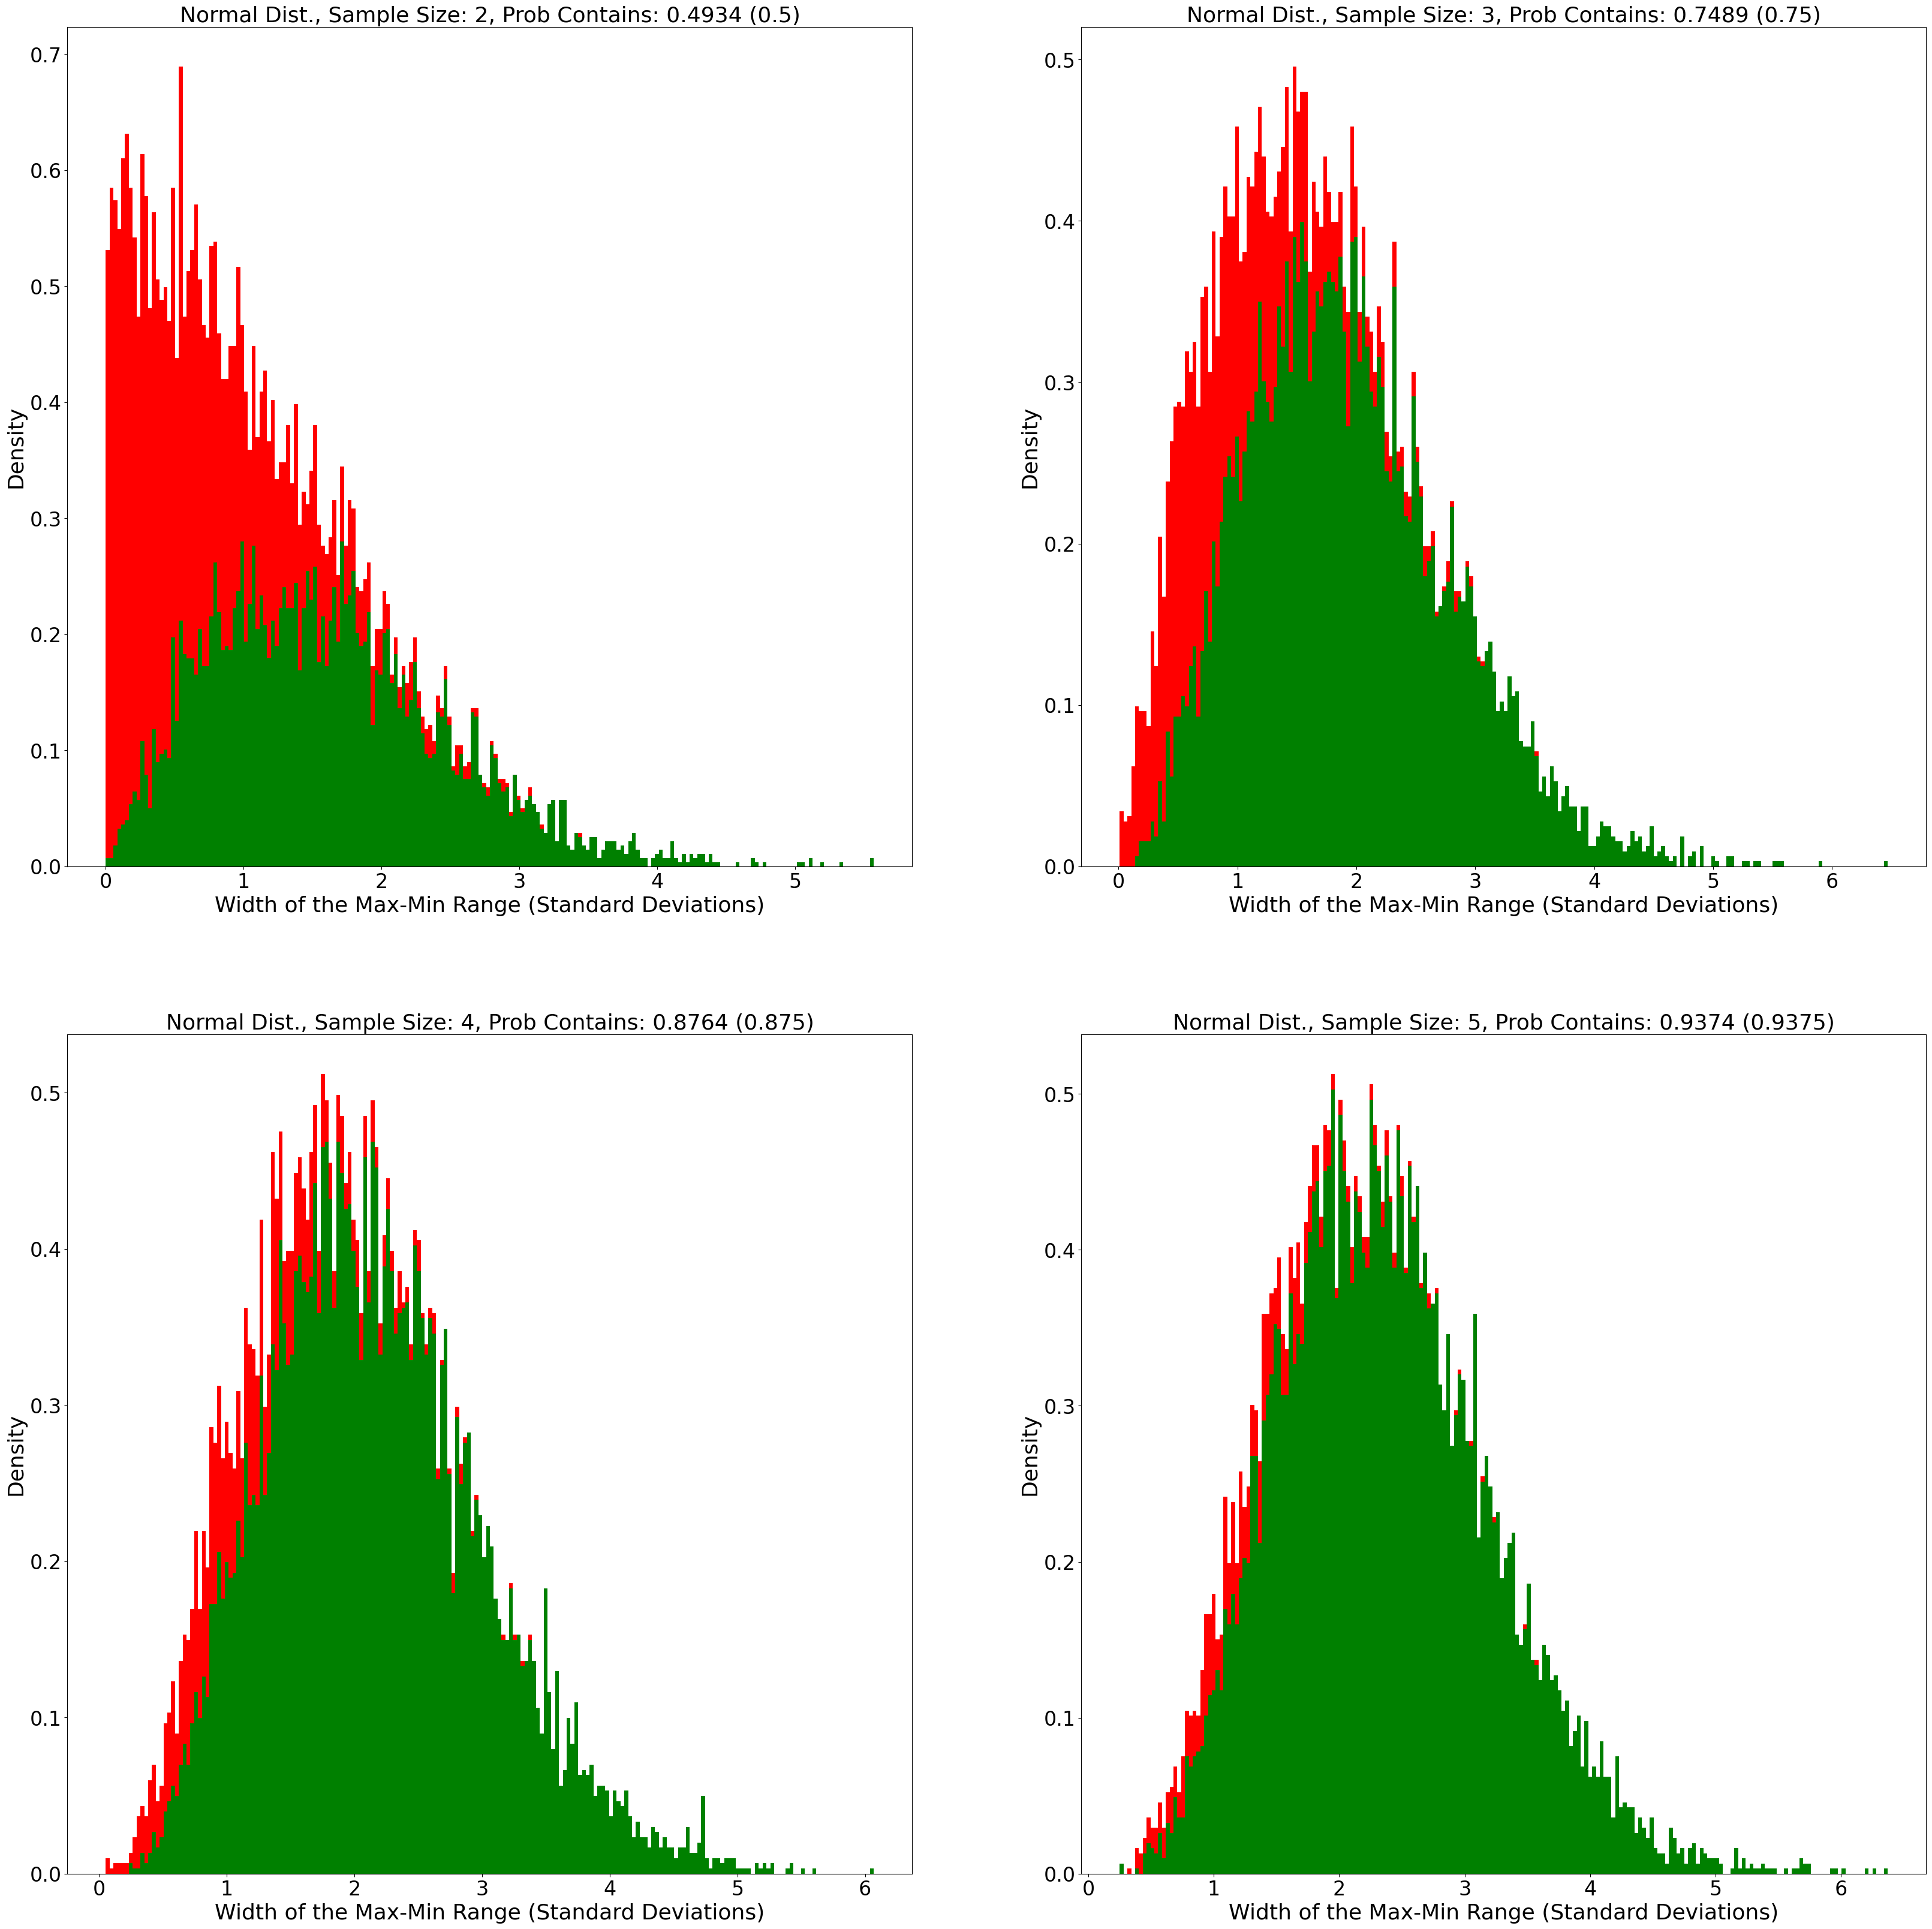

In [103]:
# Set seed, set with digits of pi for credible arbitrariness
rand_seed = 314
# Global parameters
num_simulations = 10000 # num sims per sample_size
median = 0
estimated_sample_sizes = range(2, 6)
# Regularize distribution w/ variance=1 and center/mean/median=0
get_samples_fn = lambda n: np.random.normal(loc=0, scale=1, size=n)
dist_name = "Normal Dist."

x = np.linspace(-5, 5, 1000)
y = norm.pdf(x=x, loc=0, scale=1)
plt.plot(x, y)
plt.axvline(x=median, color='red', linestyle='--', linewidth=1, label='median')
plt.fill_between(x, y, alpha=0.6, color='tab:blue')
plt.legend()
plt.title("Regularized Normal Dist.")
plt.xlabel("Standard Deviations")
plt.ylabel("Prob. Density")
plt.savefig("regular_normal.png", transparent=True)
plt.show()

simulate_and_graph_median_ranges(get_samples_fn, num_simulations, estimated_sample_sizes, rand_seed, dist_name)

## Uniform Distribution

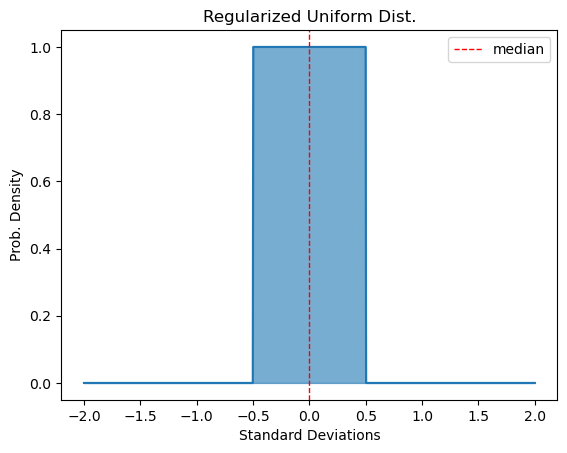

,sample_size,sample_max,sample_min,sample_range,median_in_sample_range
0,2.0,0.855728,-2.838522,3.694250,1.0
1,2.0,2.313110,-0.711147,3.024257,1.0
2,2.0,2.363394,-1.741032,4.104427,1.0
3,2.0,2.028364,-1.995461,4.023825,1.0
4,2.0,2.812185,-0.462554,3.274739,1.0
...,...,...,...,...,...
59995,7.0,2.550997,-3.305221,5.856219,1.0
59996,7.0,3.187631,-3.200346,6.387977,1.0
59997,7.0,2.965813,-2.658379,5.624192,1.0
59998,7.0,3.448544,-1.583245,5.031789,1.0


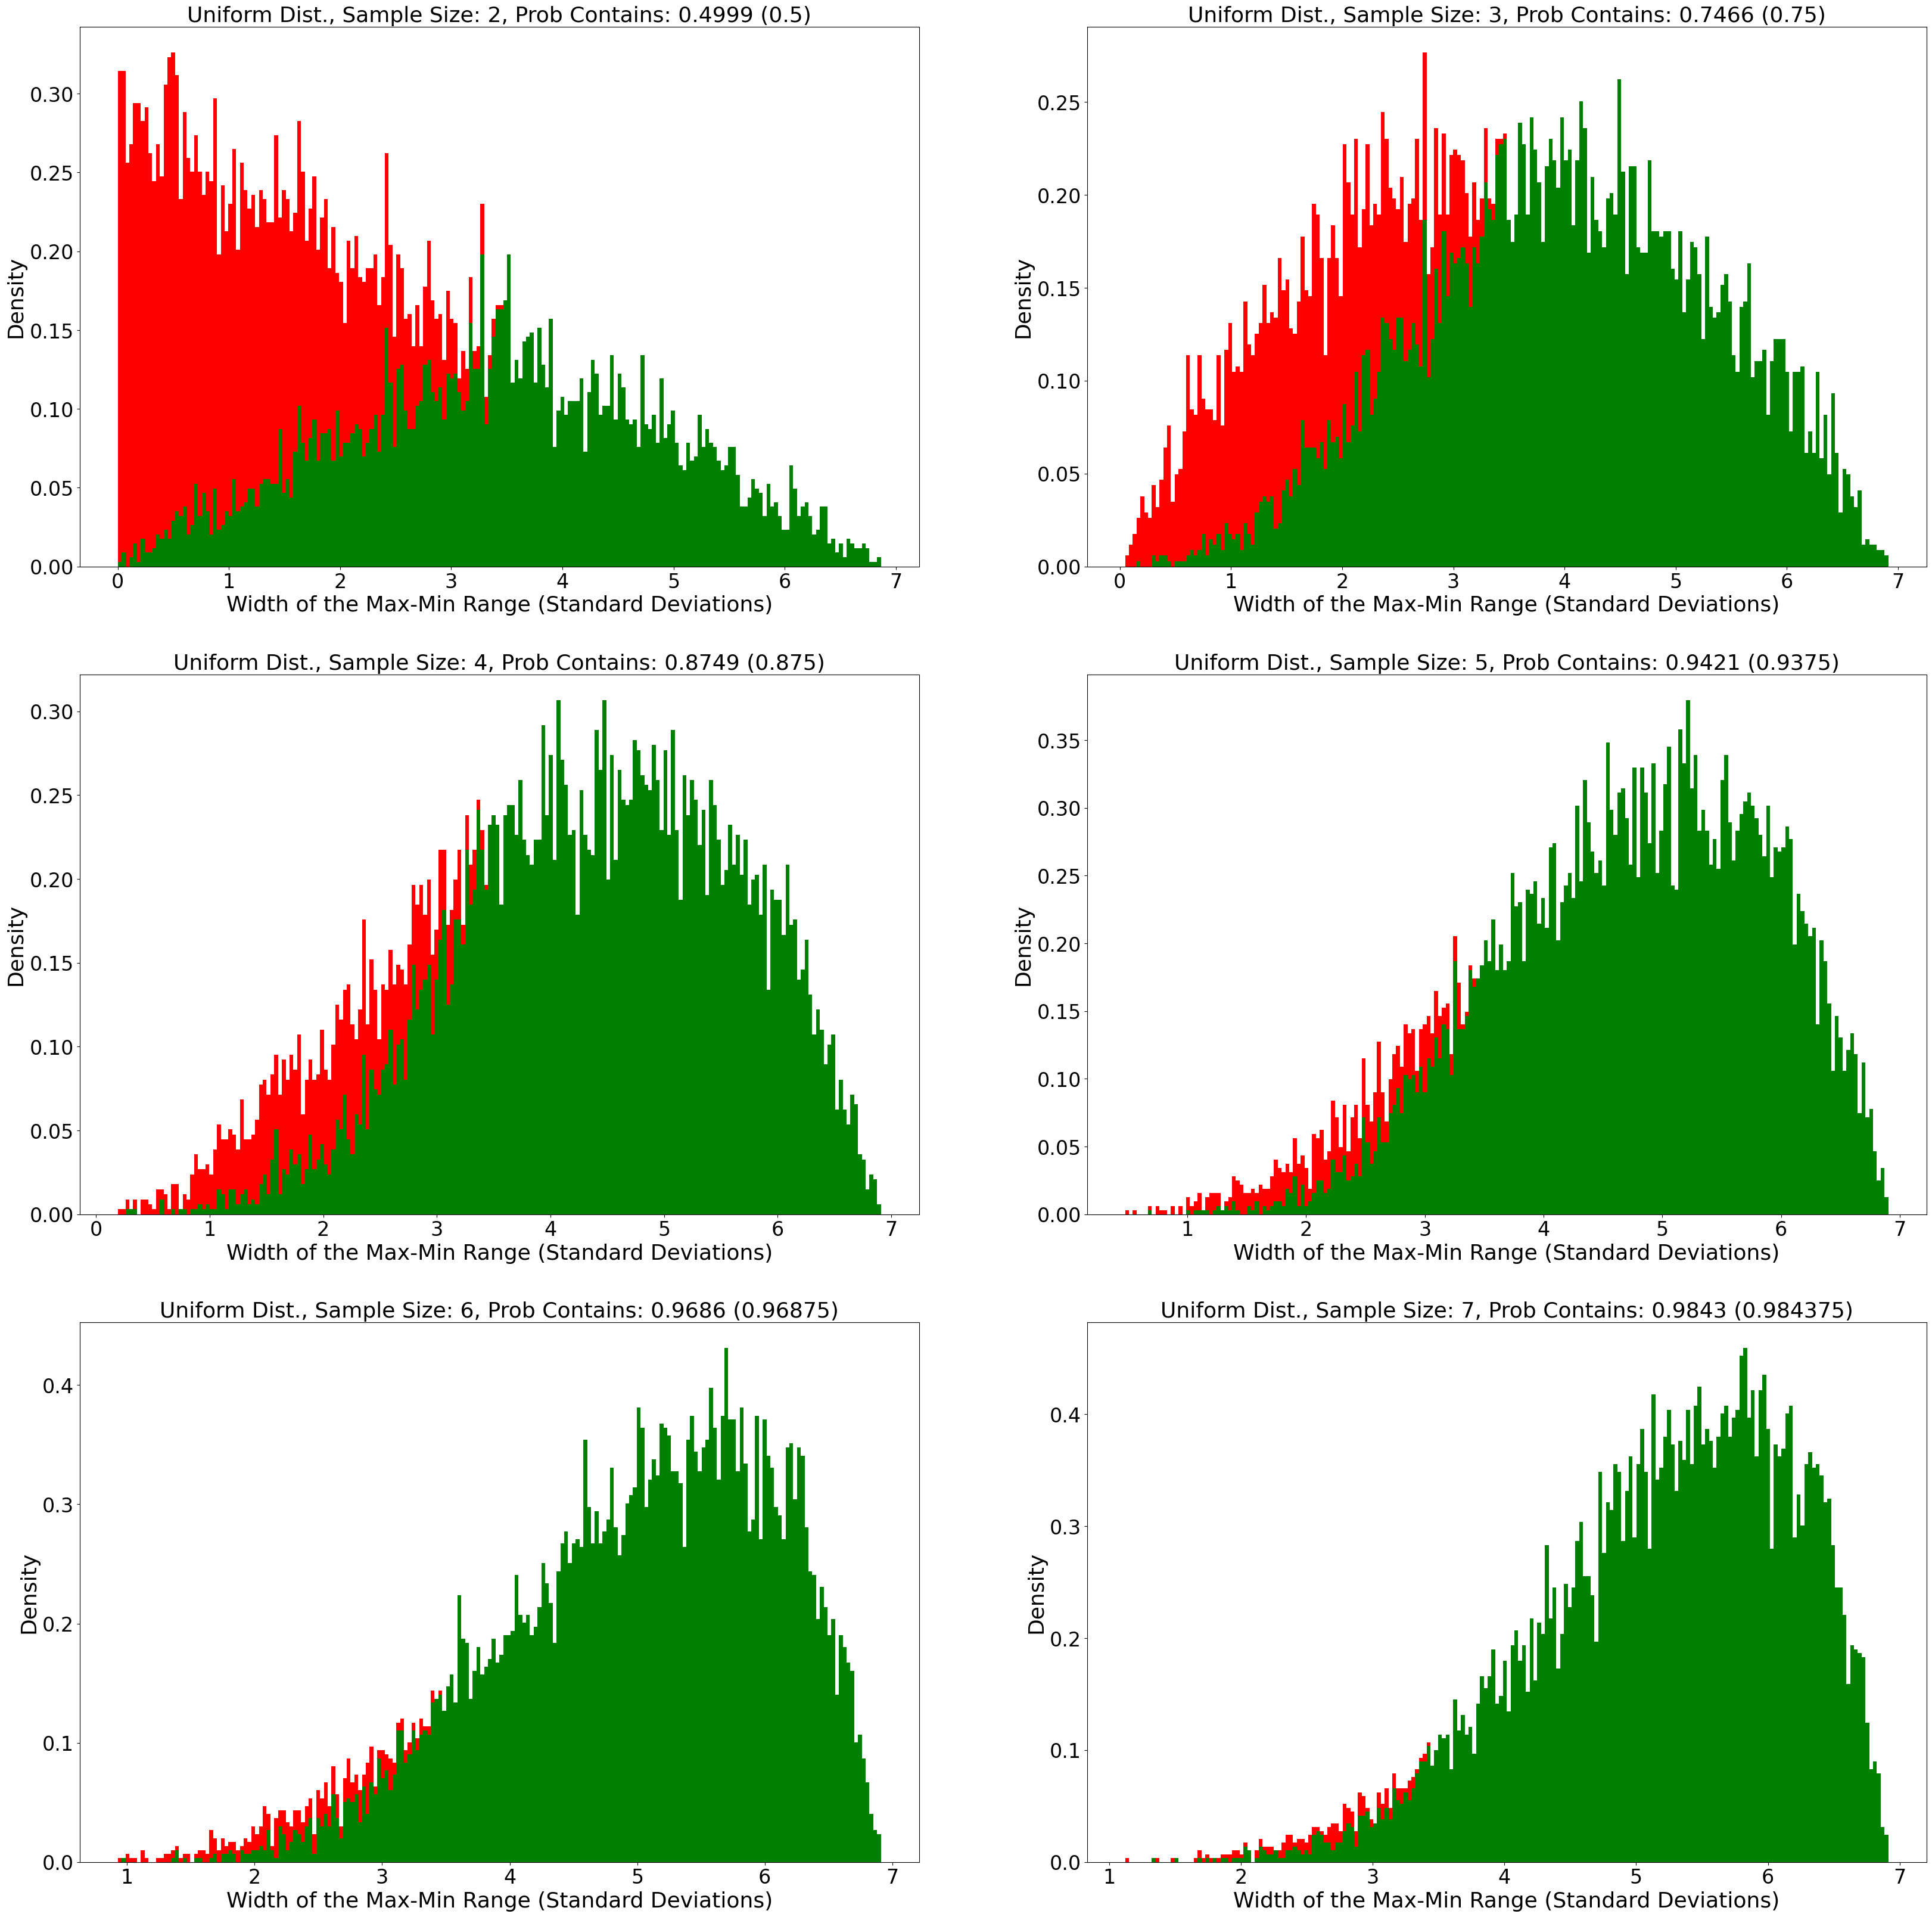

In [106]:
# Set seed
rand_seed = 3141
# Global parameters
num_simulations = 10000 # num sims per sample_size
median = 0
estimated_sample_sizes = range(2, 8)
# Regularize distribution w/ variance=1 and center/mean/median=0
get_samples_fn = lambda n: np.random.uniform(low=-1 * 12 ** 0.5, high=12 ** 0.5, size=n)
dist_name = "Uniform Dist."

x = np.linspace(-2, 2, 1000)
y = uniform.pdf(x=x, loc=-0.5, scale=1)
plt.plot(x, y)
plt.axvline(x=median, color='red', linestyle='--', linewidth=1, label='median')
plt.fill_between(x, y, alpha=0.6, color='tab:blue')
plt.title("Regularized Uniform Dist.")
plt.xlabel("Standard Deviations")
plt.ylabel("Prob. Density")
plt.legend()
plt.savefig("regular_uniform.png", transparent=True)
plt.show()

simulate_and_graph_median_ranges(get_samples_fn, num_simulations, estimated_sample_sizes, rand_seed, dist_name)

## Exponential Distribution

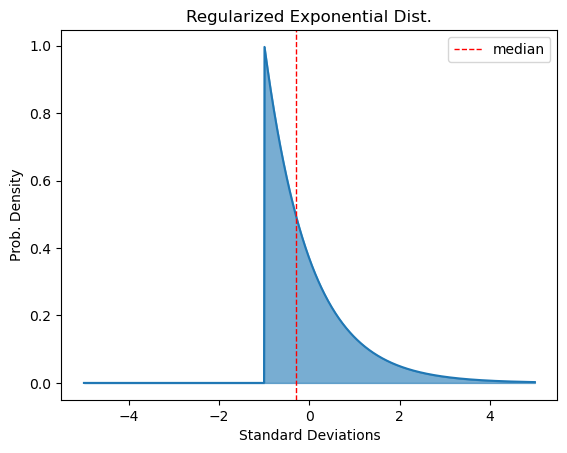

,sample_size,sample_max,sample_min,sample_range,median_in_sample_range
0,2.0,0.124466,0.037946,0.086520,0.0
1,2.0,2.530304,1.161123,1.369180,0.0
2,2.0,1.397620,0.734961,0.662658,0.0
3,2.0,-0.029798,-0.333086,0.303288,1.0
4,2.0,0.031456,-0.488558,0.520014,1.0
...,...,...,...,...,...
59995,7.0,1.675984,-0.596762,2.272746,1.0
59996,7.0,1.180328,-0.829734,2.010062,1.0
59997,7.0,1.660054,-0.804687,2.464742,1.0
59998,7.0,0.795443,-0.920323,1.715766,1.0


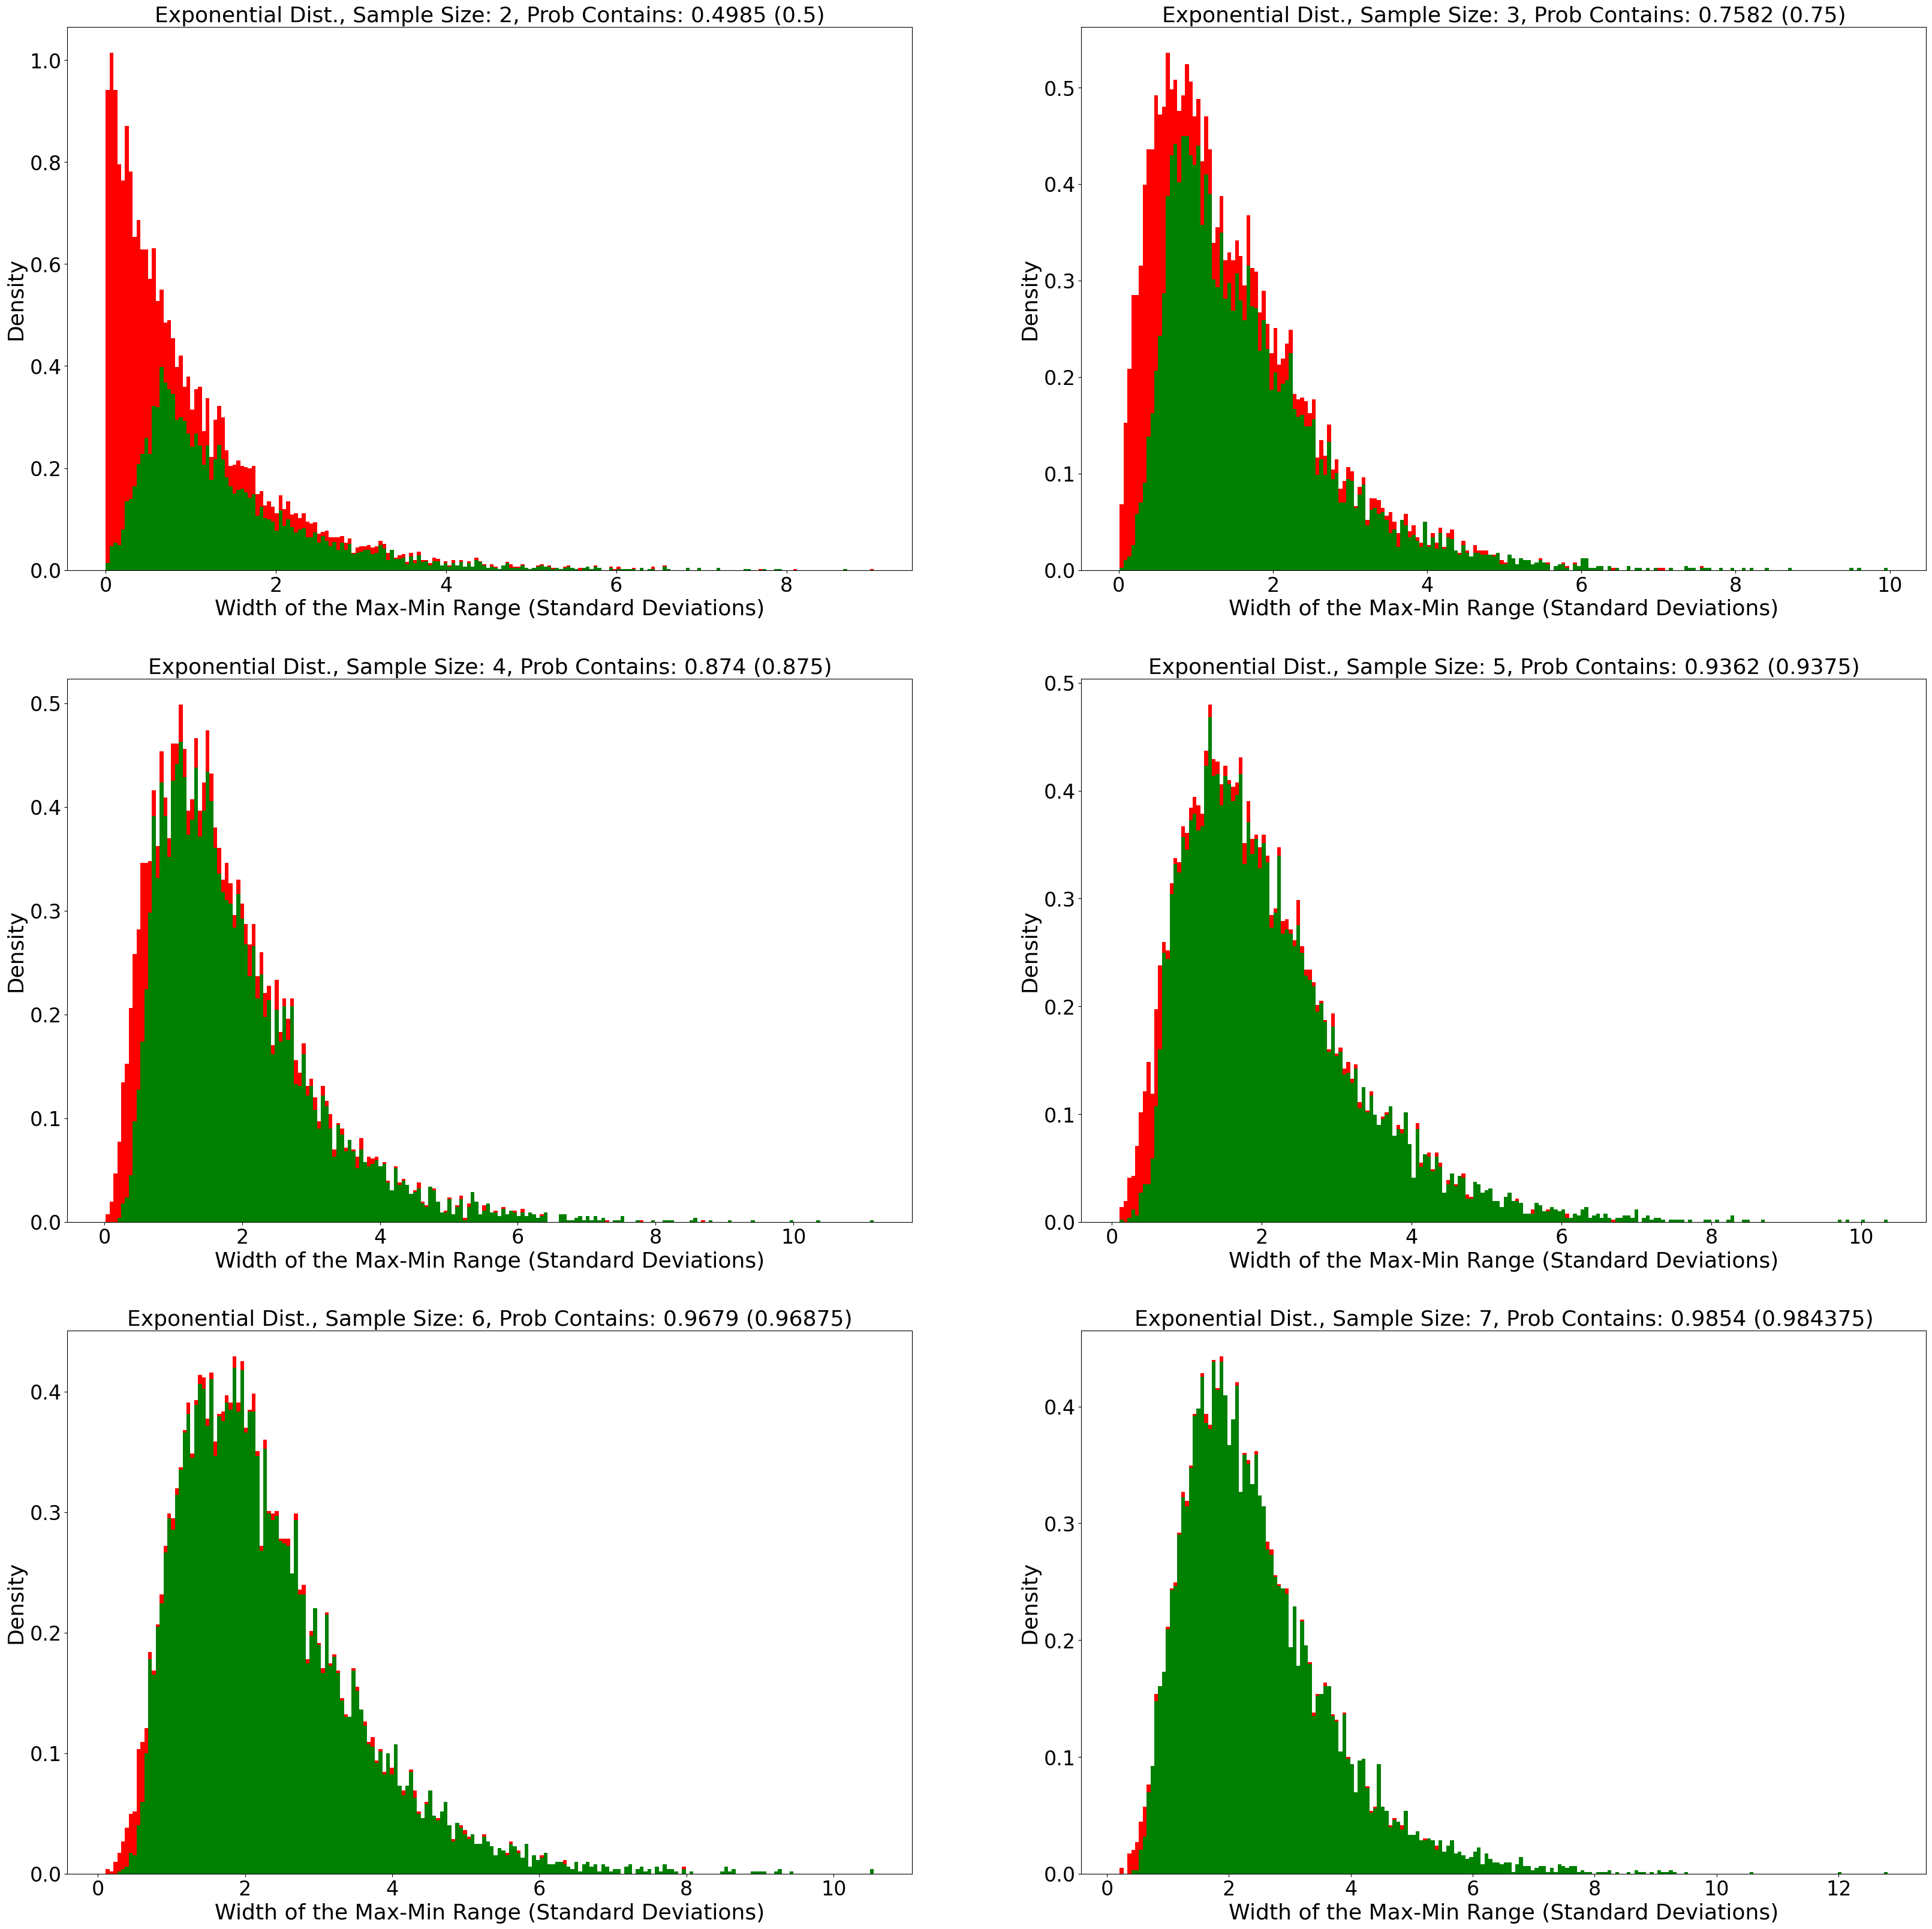

In [108]:
# Set seed
rand_seed = 31415
# Global parameters
num_simulations = 10000 # num sims per sample_size
# median is ln(2)/lambda, with lambda 1, this is ln(2), np.log() is the natural log, subtract one to get mean to zero, variance to one
median = np.log(2) - 1
estimated_sample_sizes = range(2, 8)
# Regularize distribution w/ variance=1 and mean=0, median is ln(2)
get_samples_fn = lambda n: np.random.exponential(scale=1, size=n) - 1 # subtract one to get mean to zero, variance to one
dist_name = "Exponential Dist."

x = np.linspace(-5, 5, 1000)
y = expon.pdf(x=x, loc=-1, scale=1)
plt.plot(x, y)
plt.axvline(x=median, color='red', linestyle='--', linewidth=1, label='median')
plt.fill_between(x, y, alpha=0.6, color='tab:blue')
plt.title("Regularized Exponential Dist.")
plt.xlabel("Standard Deviations")
plt.ylabel("Prob. Density")
plt.legend()
plt.savefig("regular_exponential.png", transparent=True)
plt.show()

simulate_and_graph_median_ranges(get_samples_fn, num_simulations, estimated_sample_sizes, rand_seed, dist_name)